Lag en modell med prediktoren f (x) = softmax(xW + b) som
klassifiserer handskrevne tall. Se mnist for eksempel lasting av
MNIST datasettet, og visning og lagring av en observasjon. Du
skal oppnå en nøyaktighet på 0.9 eller over. Lag 10 .png bilder
som viser W etter optimalisering.

In [36]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [37]:
# Load observations from the mnist dataset. The observations are divided into a training set and a test set
mnist_train = torchvision.datasets.MNIST('./data', train=True, download=True)
x_train = mnist_train.data.reshape(-1, 784).float()  # Reshape input
y_train = torch.zeros((mnist_train.targets.shape[0], 10))  # Create output tensor
y_train[torch.arange(mnist_train.targets.shape[0]), mnist_train.targets] = 1  # Populate output

mnist_test = torchvision.datasets.MNIST('./data', train=False, download=True)
x_test = mnist_test.data.reshape(-1, 784).float()  # Reshape input
y_test = torch.zeros((mnist_test.targets.shape[0], 10))  # Create output tensor
y_test[torch.arange(mnist_test.targets.shape[0]), mnist_test.targets] = 1  # Populate output

print(x_train.shape)
print(y_train.shape)

torch.Size([60000, 784])
torch.Size([60000, 10])


tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


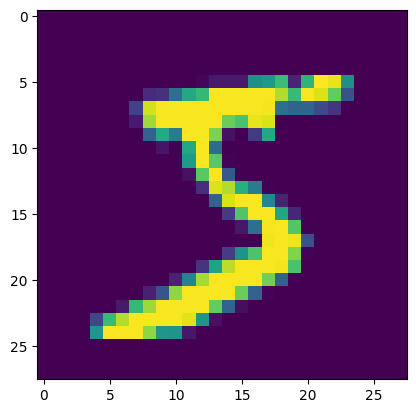

In [38]:
# Show the input of the first observation in the training set
plt.imshow(x_train[0, :].reshape(28, 28))

# Print the classification of the first observation in the training set
print(y_train[0, :])

# Save the input of the first observation in the training set
plt.imsave('x_train_1.png', x_train[0, :].reshape(28, 28))

plt.show()


In [39]:
class Model:

    def __init__(self):

        #Model variables
        self.W = torch.rand((784,10), requires_grad=True)
        self.b = torch.rand((10), requires_grad=True)

    # Will predict result
    def f(self, x):
        return torch.softmax(self.logits(x), dim=1)
    
    def logits(self, x):
        return x @ self.W + self.b

    # Cross Entropy loss
    def loss(self, x, y):
        return torch.nn.functional.cross_entropy(self.logits(x), y)
    
    def accuracy(self, x, y):
        return torch.mean(torch.eq(self.f(x).argmax(1), y.argmax(1)).float())

In [40]:
model = Model()

#Optimize: adjust W and b to minimize loss using Stochastic Gradient Descent(SGD)
optimizer = torch.optim.SGD([model.W, model.b], 0.1)
for epoch in range(1000):
    model.loss(x_train, y_train).backward() #Compute loss gradients
    optimizer.step() #Optimizes by adjusting W and b
    #similiar to model.W -= model.W.grad * 0.01 (and same for b)

    optimizer.zero_grad() #Clear gradients for next step

torch.Size([784, 10])


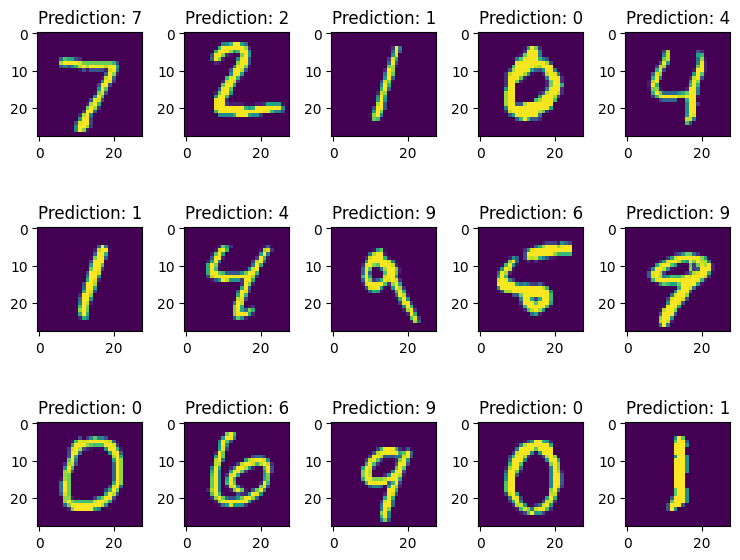

In [62]:
#print(str(y_test[0].argmax()))
print(model.W.shape)


for i in range(model.W.shape[1]):
    #28*28 = 784 = shape
    plt.imsave('W_' + str(i) + '.png', model.W[:, i].reshape(28,28).detach()) 


num = 15
num_row = 3
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_test[i, :].reshape(28,28))

    # argmax gets the index of the 1 in the result tensor, item returns this number
    ax.set_title('Prediction: {}'.format(model.f(x_test[i,:].reshape(-1,784)).argmax().item()))

plt.tight_layout()
plt.savefig('result.png')
plt.show()

